# K-Means clustering

In [1]:
# load dataset
from sklearn.datasets import load_iris

In [2]:
import pandas as pd
import numpy as np

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
df_tuple = load_iris(return_X_y=True, as_frame=True)

type(df_tuple)

tuple

In [5]:
X = df_tuple[0].values
y = df_tuple[1].values

X.shape
y.shape

(150, 4)

(150,)

In [6]:
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
norm_X = sc.fit_transform(X)
norm_X.shape
norm_X[0:10]

(150, 4)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ]])

In [8]:
class KMeansClustering:
        
    def get_distance(p1, p2):
        dist = np.sqrt(np.sum((p1 - p2)**2))
        return dist
    
    def assign_centroid(X, centroids):
        for k in centroids.keys():
            centroids[k]['points'] = []
        dict_assigned_cluster = {}
        for idx, x in enumerate(X):
            nearest_cluster = np.argmin([KMeansClustering.get_distance(x, centroids[k]['centroid']) for k in centroids.keys()])
            centroids[nearest_cluster]['points'].append(x)
            dict_assigned_cluster[idx] = nearest_cluster
        return centroids, dict_assigned_cluster
    
    def recalculate_centroid(centroids):
        for k in centroids.keys():
            pts = centroids[k]['points']
            if len(pts)>0:
                centroids[k]['centroid'] = np.mean(pts, axis=0)
        return centroids
    
    def fit(X, k:int=2, max_iteration:int=10):
        ## initialize centroids
        centroids_initial = np.random.random((k, X.shape[1]))
        centroids_initial = {idx: {'centroid': v, 'points': []} for idx, v in enumerate(centroids_initial)}
        for _ in range(max_iteration):
            ## assign each point to a centroid
            new_assignment, dict_assigned_cluster = KMeansClustering.assign_centroid(X, centroids_initial)
            ## recalculate centroid
            new_centroids = KMeansClustering.recalculate_centroid(new_assignment)
        return new_centroids, dict_assigned_cluster


In [9]:
norm_X[0:4]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667]])

In [10]:
cluster_res, dict_assigned_cluster = KMeansClustering.fit(norm_X, k=3, max_iteration=100)

len(cluster_res)
len(dict_assigned_cluster)

3

150

In [11]:
for idx in range(3):
    print(f"{idx = }")
    list(cluster_res.get(idx))[0:4]

idx = 0


['centroid', 'points']

idx = 1


['centroid', 'points']

idx = 2


['centroid', 'points']

In [12]:
for idx in range(3):
    cluster_res[idx]['centroid']

array([0.55960648, 0.37326389, 0.67355226, 0.66796875])

array([0.24158249, 0.67929293, 0.08371854, 0.0719697 ])

array([0.12433862, 0.37301587, 0.1283293 , 0.10515873])

In [13]:
for idx in range(3):
    len(cluster_res[idx]['points'])

96

33

21

In [14]:
for idx in range(3):
    cluster_res[idx]['points'][0:4]

[array([0.75      , 0.5       , 0.62711864, 0.54166667]),
 array([0.58333333, 0.5       , 0.59322034, 0.58333333]),
 array([0.72222222, 0.45833333, 0.66101695, 0.58333333]),
 array([0.33333333, 0.125     , 0.50847458, 0.5       ])]

[array([0.22222222, 0.625     , 0.06779661, 0.04166667]),
 array([0.19444444, 0.66666667, 0.06779661, 0.04166667]),
 array([0.30555556, 0.79166667, 0.11864407, 0.125     ]),
 array([0.08333333, 0.58333333, 0.06779661, 0.08333333])]

[array([0.16666667, 0.41666667, 0.06779661, 0.04166667]),
 array([0.11111111, 0.5       , 0.05084746, 0.04166667]),
 array([0.08333333, 0.45833333, 0.08474576, 0.04166667]),
 array([0.02777778, 0.375     , 0.06779661, 0.04166667])]

In [16]:
df_op = pd.DataFrame(norm_X, columns = ['sep_l', 'sep_w', 'pet_l', 'pet_w'])
df_op['label'] = pd.DataFrame(dict_assigned_cluster.values())
df_op.shape
df_op.head(3)

(150, 5)

,sep_l,sep_w,pet_l,pet_w,label
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,2
2,0.111111,0.500000,0.050847,0.041667,2


# Points in plot

In [17]:
import matplotlib.pyplot as plt

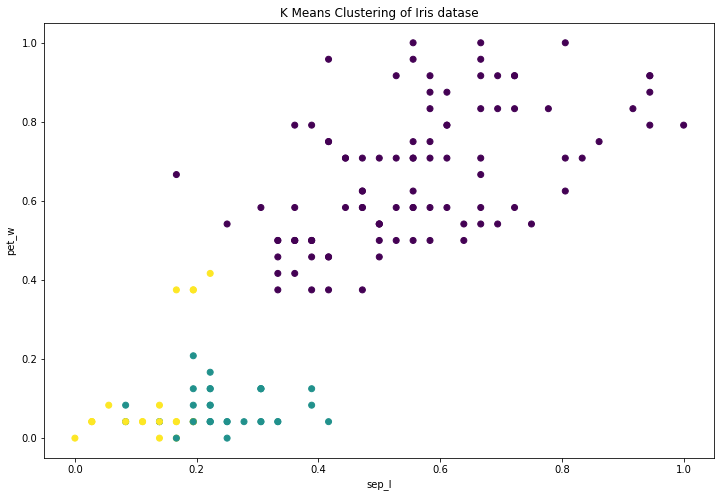

In [31]:
plt.figure(figsize=(12,8))

XLABEL = 'sep_l'
YLABEL = 'pet_w'
plt.scatter(df_op[XLABEL], df_op[YLABEL], c=df_op['label'])
plt.title('K Means Clustering of Iris datase')
plt.xlabel(XLABEL)
plt.ylabel(YLABEL)
plt.show();